## EDA (탐색적 데이터 분석)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 버전이 다를때 나타나는 경고 해결
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_train = pd.read_csv("../2_DataAnalysis/titanic/train.csv")
df_test = pd.read_csv("../2_DataAnalysis/titanic/test.csv")

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [9]:
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [10]:
df_train[df_train['Age'] < 5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


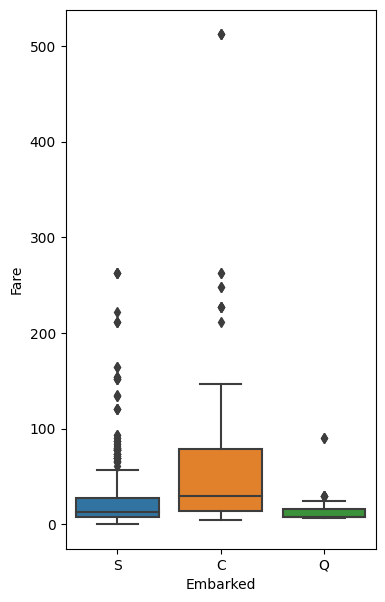

In [11]:
# boxplot을 사용해도 이상치라고 무조건 제거하는 것은 아니고 어떠한 형식으로 구성된 내용인지 파악을 해야한다.

plt.figure(figsize = (4, 7))
plt.grid(False)
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.show()

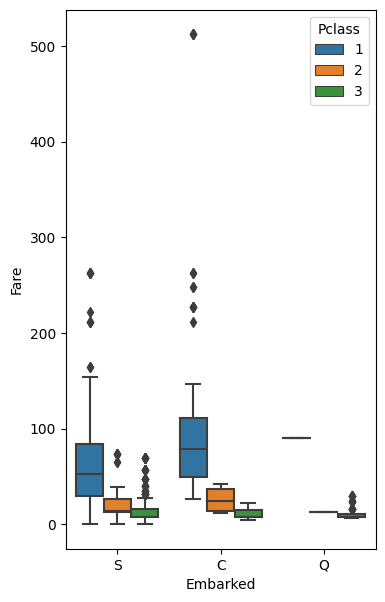

In [12]:
plt.figure(figsize=(4, 7))
plt.grid(False)
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=df_train)
plt.show()

In [13]:
total = df_train.isnull().sum().sort_values(ascending=False)
total

# null개수를 count해서 합계를 내림차순으로 정렬
# 학습데이터에서는 Cabin, Age, Embarked만 결측치 존재

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [14]:
percent = ((df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False))*100
percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [15]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


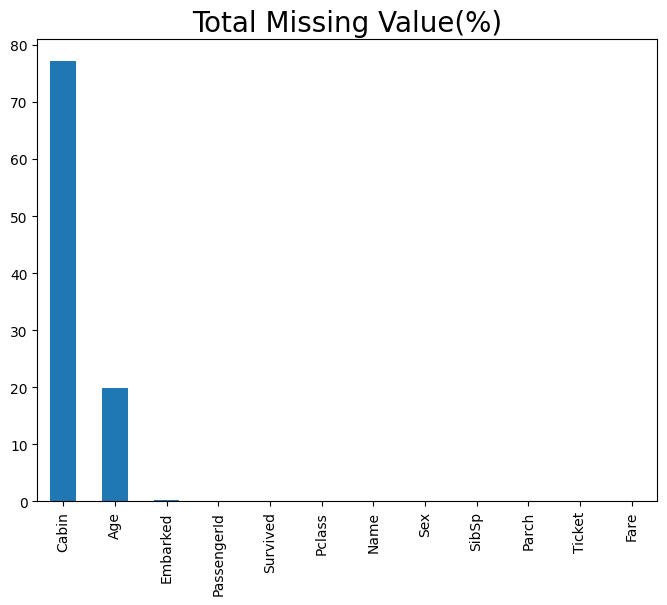

In [16]:
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8, 6), fontsize=10)
plt.grid(False)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
# plt.xlabel, plt.ylabel("", fontsize=50)
plt.title("Total Missing Value(%)", fontsize=20)
plt.show()

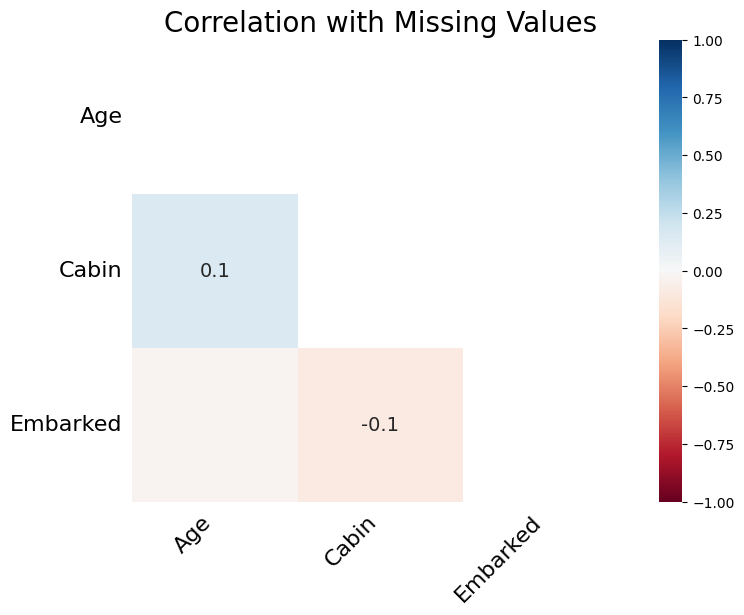

In [17]:
import missingno as msno
# pip install missingno 설치

missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
msno.heatmap(df_train[missingdata_df], figsize=(8, 6))
plt.title("Correlation with Missing Values", fontsize=20)
plt.show()

# 결측치가 존재하면 missingdata_df에 저장하고 이를 이용하여 heatmap을 그림
# missingno라이브러리는 결측치의 상관관계를 가지고 그래프로 나타내줌
# 결과값을 보면 결측치간 상관관계가 거의 없다고 볼 수 있다.

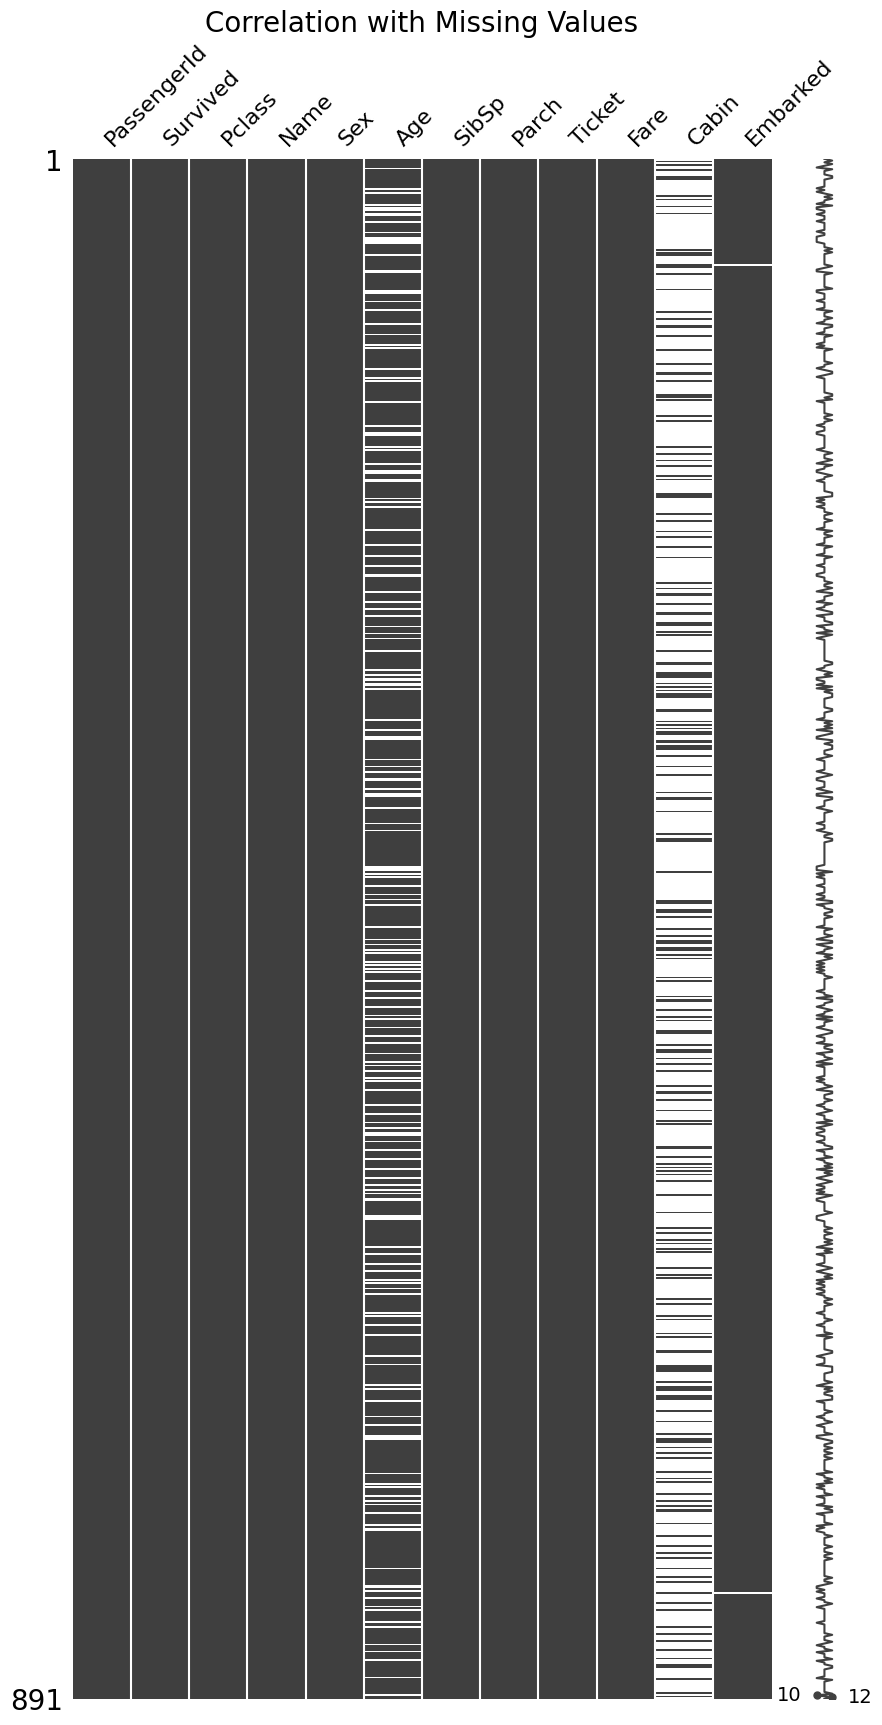

In [18]:
msno.matrix(df_train, figsize=(10, 20))
plt.title("Correlation with Missing Values", fontsize=20)
plt.show()

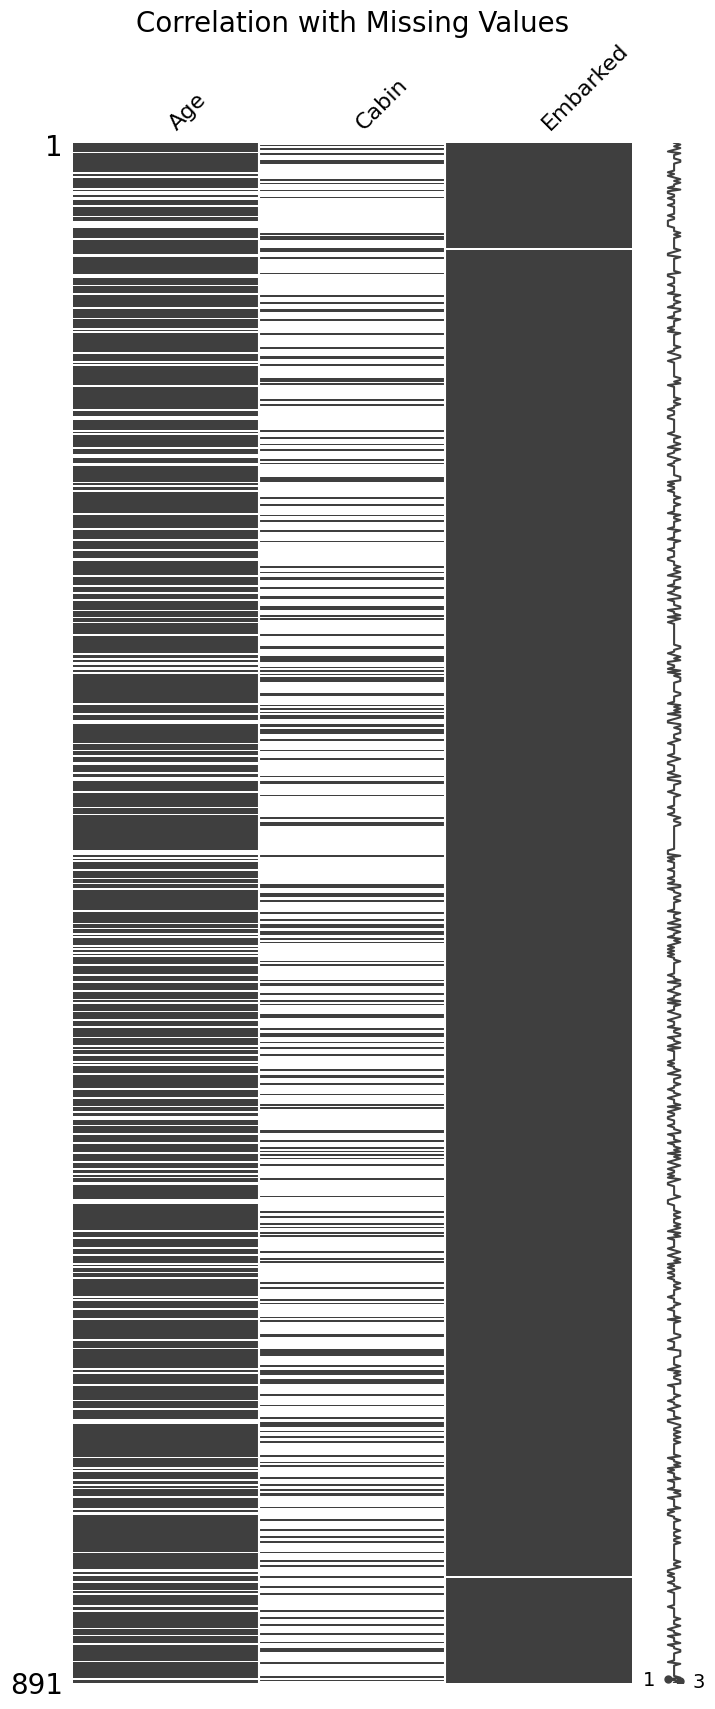

In [19]:
missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
msno.matrix(df_train[missingdata_df], figsize=(8, 20))
plt.title("Correlation with Missing Values", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Correlation with Missing Values')

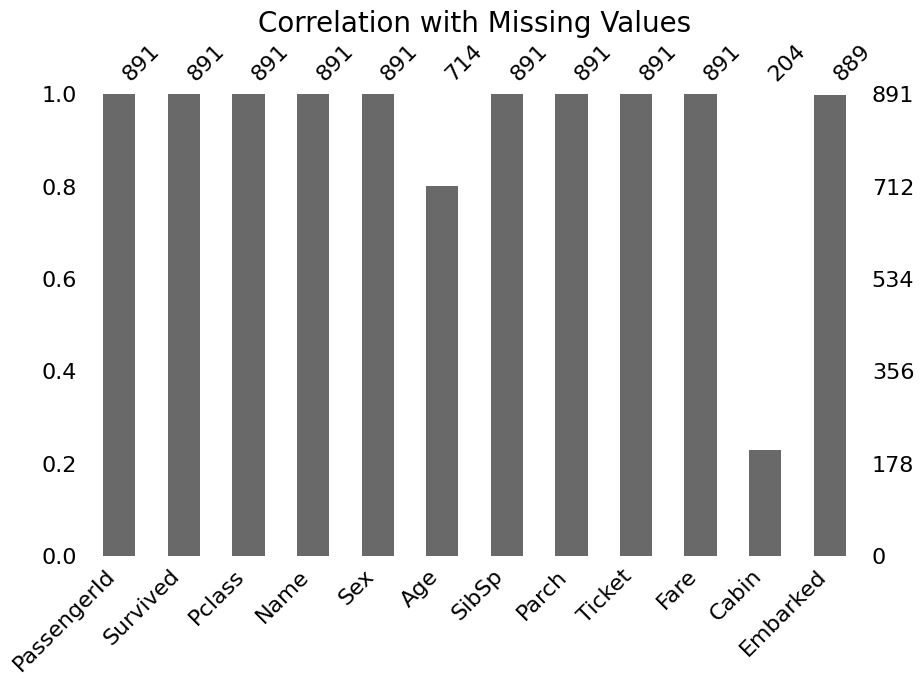

In [20]:
msno.bar(df_train, figsize=(10, 6))
plt.title("Correlation with Missing Values", fontsize=20)

In [21]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train[['Age']])
df_imputed = pd.DataFrame(imp_mean.transform(df_train[['Age']]), columns={'Age'})
df_imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [22]:
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(df_train[['Embarked']])
df_imputed = pd.DataFrame(imp_mean.transform(df_train[['Embarked']]), columns={'Embarked'})
df_imputed

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [24]:
from impyute.imputation.cs import mice
# pip install impyute

df_train_num = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
np_imputed = mice(df_train_num.values)
df_imputed = pd.DataFrame(np_imputed, columns=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
df_imputed

# 수치 데이터 컬럼만 가지고 다중대체법 사용
# mice는 가장 최적의 값을 찾아 대체시켜줌
# 888행의 Age를 보면 평균과 달라진 내용을 확인할 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,23.457198,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


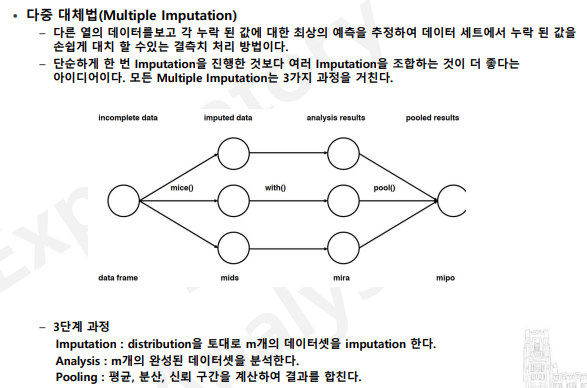

---

## 타이타닉 데이터 실습-2 (~38p)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
df_train = pd.read_csv("../2_DataAnalysis/titanic/train.csv")
df_test = pd.read_csv("../2_DataAnalysis/titanic/test.csv")

In [27]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


// 데이터의 쉬운 가공을 위해 train과 test데이터를 합쳐주고 Survived는 삭제해준다

In [29]:
train_df_copy = df_train.drop(['Survived'], axis=1)
total_set = pd.concat([train_df_copy, df_test])
total_set.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [30]:
train_data = df_train.copy()
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Feature 분석
// Null Data check

In [31]:
total_set.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [32]:
total_set.isnull().sum() / len(total_set)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

// Cabin의 Null Data percentage가 77퍼센트이기 때문에 이 열은 drop

In [33]:
total_set.drop('Cabin', axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


// 전체 생존률은 얼마일까?<br>
// train data의 전체생존률 확인 => 38.4%

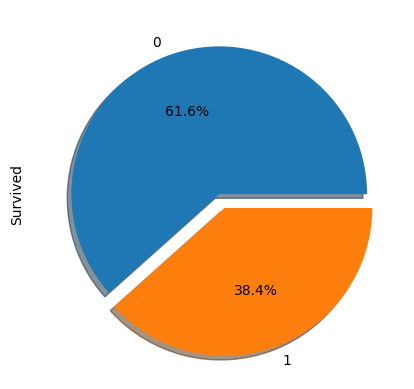

In [35]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.show()

### 각 Feature에 대한 고찰

#### 1. Sex Feature -> 카테고리 데이터로 변환

// 성별 별로 생존률을 확인해보면 아래와 같이 남성의 생존률은 약 19%이며, 여성의 생존률은 약 74%이다.

In [36]:
len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]) / len(df_train.loc[(df_train['Sex'] == 'male')])

0.18890814558058924

In [37]:
len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]) / len(df_train.loc[(df_train['Sex'] == 'female')])

0.7420382165605095

// 성별 별로 생존률을 파이차트로 나타내면 아래와 같다.

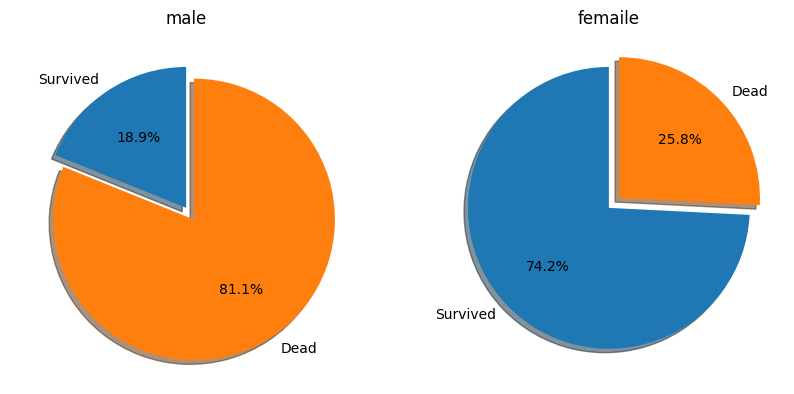

In [38]:
labels = 'Survived', 'Dead'
sizes_m = [len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]), 
           len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)])]
sizes_f = [len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]), 
           len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)])]
explode = (0, 0.1)
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('femaile')

plt.show()

// 이는 성별에 따라 생존률에 영향이 있음을 알 수 있다.<br>
// 성별의 값은 male, female 두 가지가 았으므로 아래와 같이 category값 0, 1로 변환해주었다.

In [39]:
total_set['Sex'].unique()
total_set['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
train_data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
total_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### 2. Name

In [40]:
total_set['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

// Mr. / Mrs. / Miss. 등의 값만 뽑아본다

In [41]:
import re
def find_M(datas):
    wow = re.search("[A-Z][a-z]+\.", datas)
    if wow == None:
        return None
    return wow.group(0)

total_set['Name_convert'] = total_set['Name'].map(find_M)
train_data['Name_convert'] = train_data['Name'].map(find_M)
total_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.


// 뽑아낸 값들과 각 값들의 수를 count 해본다.

In [42]:
total_set['Name_convert'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [43]:
total_set['Name_convert'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name_convert, dtype: int64

// 개수가 애매한 Dr. 승객들을 살펴보니 1명을 제외하고 남자다. 그래서 Dr.은 Mr.과 동일하게 처리하도록 하고 나중에 1명만 Mrs.로 변경하도록 한다.<br>
// (PassengerId = 797)

In [44]:
total_set[total_set['Name_convert'] == 'Dr.']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
245,246,1,"Minahan, Dr. William Edward",0,44.0,2,0,19928,90.0000,Q,Dr.
317,318,2,"Moraweck, Dr. Ernest",0,54.0,0,0,29011,14.0000,S,Dr.
398,399,2,"Pain, Dr. Alfred",0,23.0,0,0,244278,10.5000,S,Dr.
632,633,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,13214,30.5000,C,Dr.
660,661,1,"Frauenthal, Dr. Henry William",0,50.0,2,0,PC 17611,133.6500,S,Dr.
766,767,1,"Brewe, Dr. Arthur Jackson",0,NaN,0,0,112379,39.6000,C,Dr.
796,797,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.
293,1185,1,"Dodge, Dr. Washington",0,53.0,1,1,33638,81.8583,S,Dr.


// Rev. 승객들을 살펴보니 모두 남자이다. 그래서 Rev.도 Mr.과 동일하게 처리하도록 한다.

In [45]:
total_set[total_set['Name_convert'] == 'Rev.']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
149,150,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,S,Rev.
150,151,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,S,Rev.
249,250,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,S,Rev.
626,627,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,Q,Rev.
848,849,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,S,Rev.
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,S,Rev.
149,1041,2,"Lahtinen, Rev. William",0,30.0,1,1,250651,26.000,S,Rev.
164,1056,2,"Peruschitz, Rev. Joseph Maria",0,41.0,0,0,237393,13.000,S,Rev.


// 상위 4개 값 Mr. Miss. Mrs. Master.은 0~3으로 매칭시키고,<br>
// Dr. Rev. Major. Col. Sir.은 Mr.과 같은 값으로 처리한다.<br>
// Lady. Ms. Mile. 은 Miss.와 같은 값으로 처리한다. <br>
// 나머지는 4로 매칭시킨다.

In [46]:
total_set['name_code'] = total_set.Name_convert.map({"Mr.": 0, "Miss.": 1, "Mrs.": 2, "Master.": 3, "Dr.": 0, "Rev.": 0, "Major.": 0, "Col.": 0, "Sir.": 0, "Lady.": 1, "Ms.": 1, "Mile.": 1})
total_set['name_code'].head()

0    0.0
1    2.0
2    1.0
3    2.0
4    0.0
Name: name_code, dtype: float64

In [47]:
total_set['name_code'].value_counts()

0.0    780
1.0    263
2.0    197
3.0     61
Name: name_code, dtype: int64

In [48]:
total_set[total_set['name_code'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
30,31,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,C,Don.,NaN
369,370,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,C,Mme.,NaN
641,642,1,"Sagesser, Mlle. Emma",1,24.0,0,0,PC 17477,69.3000,C,Mlle.,NaN
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,24.0,0,0,PC 17482,49.5042,C,Mlle.,NaN
745,746,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,S,Capt.,NaN
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5000,S,Countess.,NaN
822,823,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,19972,0.0000,S,Jonkheer.,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,NaN


// 매칭되지 않은 이름들은 4로 넣어준다.

In [49]:
total_set['name_code'].fillna(4, inplace=True)
total_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   int64  
 4   Age           1046 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1308 non-null   float64
 9   Embarked      1307 non-null   object 
 10  Name_convert  1309 non-null   object 
 11  name_code     1309 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


In [50]:
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S,Mr.,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,4.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.,0.0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S,Mr.,0.0


In [51]:
total_set.loc[(total_set['name_code'] == 0) & (total_set['Sex'] == 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
796,797,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.,0.0


In [52]:
total_set.loc[(total_set['name_code'] == 0) & (total_set['Sex'] == 1), ['name_code']] = 2

// Name Column에서 Mr. Mrs. 등을 추출했으므로 Name column, Name_convert 열은 삭제한다.

In [53]:
total_set.drop(['Name', 'Name_convert'], axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
0,1,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,2.0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,1,35.0,1,0,113803,53.1000,S,2.0
4,5,3,0,35.0,0,0,373450,8.0500,S,0.0


// train_data도 변환시켜준다.

In [54]:
train_data['name_code'] = train_data.Name_convert.map({"Mr.": 0, "Miss.": 1, "Mrs.": 2, "Master.": 3, "Dr.": 0, "Rev.": 0, "Major.": 0, "Col.": 0, "Sir.": 0, "Lady.": 1, "Ms.": 1, "Mile.": 1})
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,Rev.,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,Miss.,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S,Miss.,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,Mr.,0.0


In [55]:
train_data.loc[(train_data['name_code'] == 0) & (train_data['Sex'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
796,797,1,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.,0.0


In [56]:
train_data.loc[(train_data['name_code'] == 0) & (train_data['Sex'] == 1), ['name_code']] = 2

In [57]:
train_data['name_code'].fillna(4, inplace=True)

In [58]:
train_data.drop(['Name', 'Name_convert'], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0.0


// Name code별 생존률을 Factor plot으로 살펴보자.<br>
// Factor plot은 다양한 범주형 값을 가지는 데이터를 시각화할 수 있다.<br>
// Name_code: "Mr.": 0, "Miss.": 1, "Mrs.": 2, "Master.":3, 그 외: 4

In [59]:
import seaborn as sns

sns.factorplot(x='name_code', y='Survived', data=train_data)
plt.show()

# factorplot()은 seabor의 버전이 업그레이드되며 삭제됨
# 확인해보고싶다면 10버전으로 확인할 수 있다.
# pip install --upgrade seaborn==0.10.0

AttributeError: module 'seaborn' has no attribute 'factorplot'

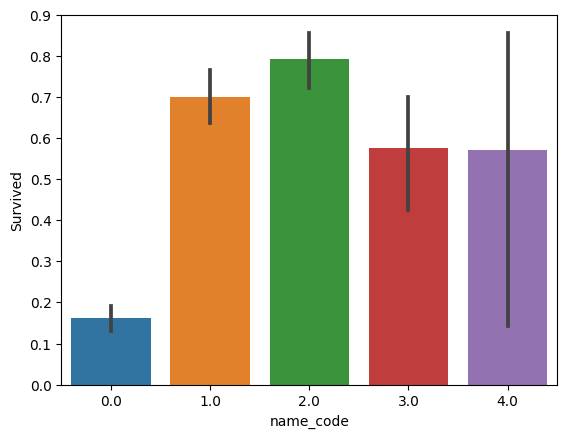

In [60]:
sns.barplot(x='name_code', y='Survived', data=train_data)
plt.show()

// Mr.이 포함된 이름이 가장 생존률이 낮고, Miss. Mrs.가 포함된 이름은 생존률이 높은 편이다.<br>
// 남성, 여성을 각각 분리하여 살펴보자.

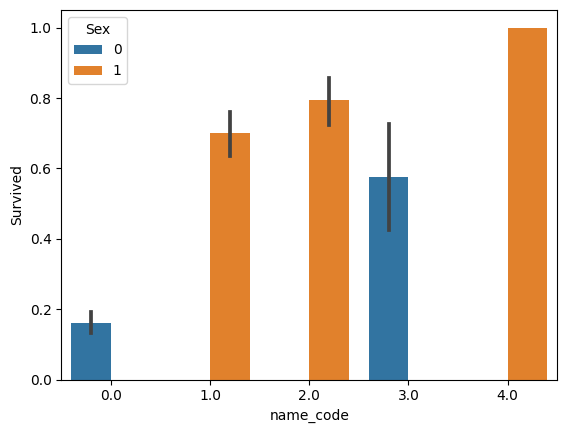

In [61]:
sns.barplot(x='name_code', y='Survived', hue='Sex', data=train_data)
plt.show()

// Mr.(0)이 속한 이름을 가진 승객의 생존률은 0.2 이하이며, Miss. Mrs.(1, 2)를 가진 승객들은 생존률이 높았음을 알 수 있다.<br>
// 위의 남성보다 여성의 생존률이 높았다는 결과와 동일 맥락이라 볼 수 있다.

#### Pclass Feature

// class별 생존자를 세어보면 아래와 같다.<br>
// 아래 crosstab을 보면 1st class는 생존자가 많고, 3rd class는 사망자가 많음을 볼 수 있다.

In [62]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


// 파이차트를 그려보면 더 쉽게 알 수 있다.

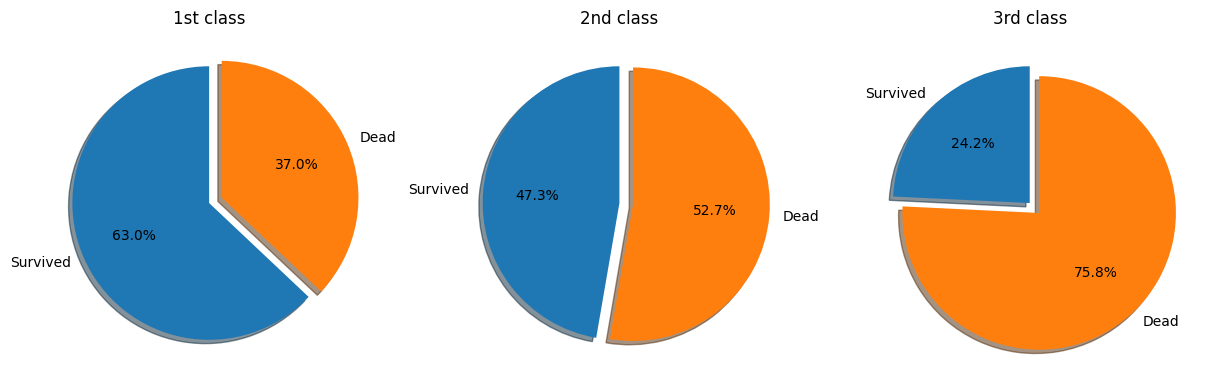

In [63]:
labels = 'Survived', 'Dead'

sizes_1 = [len(train_data.loc[(train_data['Pclass'] == 1) & (train_data['Survived'] == 1)]),
          len(train_data.loc[(train_data['Pclass'] == 1) & (train_data['Survived'] == 0)])]
sizes_2 = [len(train_data.loc[(train_data['Pclass'] == 2) & (train_data['Survived'] == 1)]),
          len(train_data.loc[(train_data['Pclass'] == 2) & (train_data['Survived'] == 0)])]
sizes_3 = [len(train_data.loc[(train_data['Pclass'] == 3) & (train_data['Survived'] == 1)]),
          len(train_data.loc[(train_data['Pclass'] == 3) & (train_data['Survived'] == 0)])]

explode = (0, 0.1)
fig = plt.figure()
fig.set_size_inches(15, 5)

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')
ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('2nd class')
ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title('3rd class')

plt.show()

// 이로써 Pclass가 생존률에 미치는 영향이 컸음을 볼 수 있다.<br>
// 그럼 Pclass와 성별별로 살펴보자.

In [64]:
pd.crosstab([train_data.Pclass, train_data.Sex], train_data.Survived, margins=True).style.background_gradient(cmap='summer_r')

// 1st class의 여성(1)은 생존자가 많았음을 볼 수 있다.<br>
// 2nd class의 여성도 마찬가지다.<br>
// 2nd, 3rd class의 남성(0)은 사망자가 많다.<br>
<br>
// 즉, 생존확률은 다음과 같은 분포를 보임을 확인할 수 있다.<br>
// 1st > 2nd > 3rd class, male < female

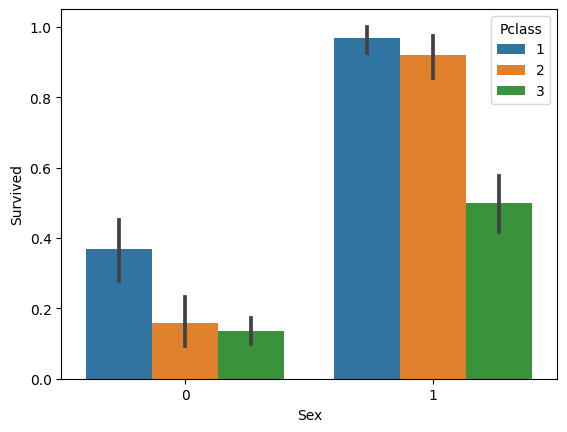

In [65]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)
plt.show()

#### Age Feature

// 우선 Age의 Null 데이터 개수를 다시 확인해보고, 평균/최대/최솟값도 확인해보자.

In [66]:
total_set['Age'].isnull().sum()

263

In [67]:
total_set['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

// 263개의 없는 값을 어떻게 채울지 고민해보자.<br>
// Pclass와 Sex를 그룹으로 평균 나이를 살펴본다.

In [68]:
total_set.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex
1       0      41.029272
        1      37.037594
2       0      30.815380
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64

// 1 -> 3 class로 갈수록 나이가 어려지며, 동일 class 내에서는 남자들의 나이가 더 많은 것을 살펴볼 수 있다.<br>
// 그래서 missing value를 속한 Pclass와 Sex의 평균 나이값으로 채워준다.

In [69]:
total_set['Age'].fillna(total_set.groupby(['Pclass', 'Sex'])['Age'].transform("mean"), inplace=True)
total_set.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
413,1305,3,0,25.962264,0,0,A.5. 3236,8.0500,S,0.0
414,1306,1,1,39.000000,0,0,PC 17758,108.9000,C,4.0
415,1307,3,0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0
416,1308,3,0,25.962264,0,0,359309,8.0500,S,0.0
417,1309,3,0,25.962264,1,1,2668,22.3583,C,3.0


// 이제 나이 분포를 그래프로 그려보고자 한다. 각 Age별로 count를 하여 표로 그려보자.

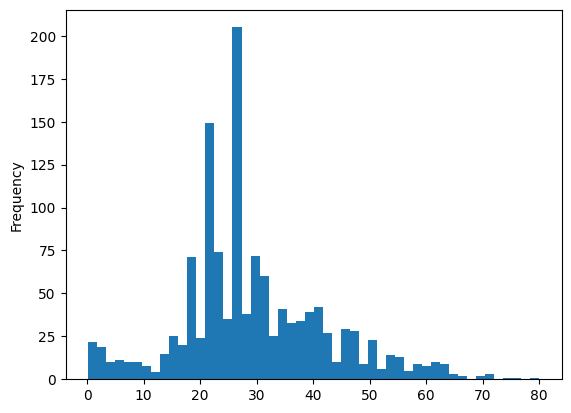

In [70]:
total_set['Age'].plot.hist(bins=50)
plt.show()

// 위의 그래프를 보면 주 나이대가 20~40대에 많이 분포해있는 것을 알 수 있다.<br>
<br>
// 다음은 나이에 따른 생존자 수를 알아보도록 하자.

In [71]:
train_data['Age'].fillna(train_data.groupby(['Pclass', 'Sex'])['Age'].transform("mean"), inplace=True)
train_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
886,887,0,2,0,27.00,0,0,211536,13.00,S,0.0
887,888,1,1,1,19.00,0,0,112053,30.00,S,1.0
888,889,0,3,1,21.75,1,2,W./C. 6607,23.45,S,1.0
889,890,1,1,0,26.00,0,0,111369,30.00,C,0.0
890,891,0,3,0,32.00,0,0,370376,7.75,Q,0.0


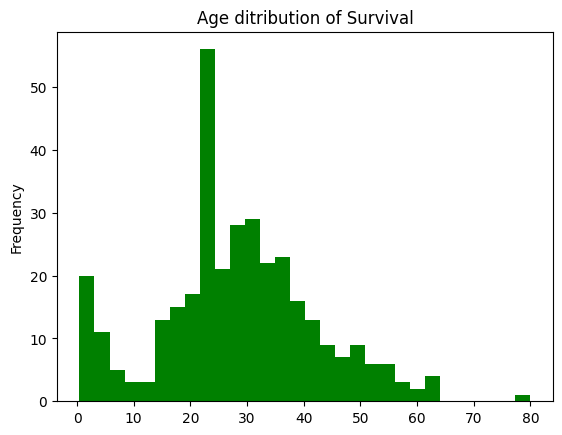

In [72]:
train_data[train_data['Survived'] == 1]['Age'].plot.hist(bins=30, color='g')
plt.title("Age ditribution of Survival")
plt.show()

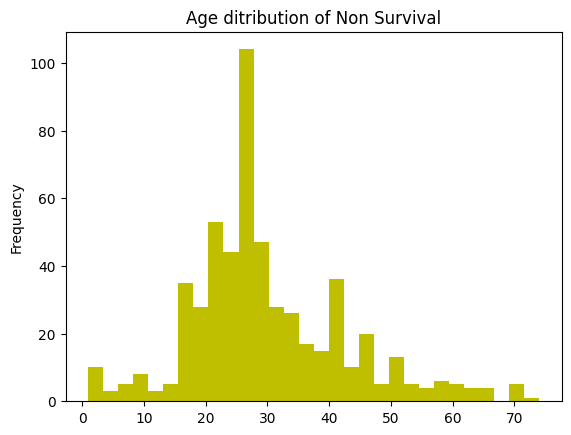

In [73]:
train_data[train_data['Survived'] == 0]['Age'].plot.hist(bins=30, color='y')
plt.title("Age ditribution of Non Survival")
plt.show()

// -5세의 아이들은 생존자가 많은 것을 확인할 수 있다. <br>
// 15-60세까지의 생존자, 사망자 분포는 비슷한 모양을 보이는 것을 알 수 있다. <br>
// 전반적인 나이 분포는 크게 유의미하게 생각되지는 않으나, 특정 나이대의 생존자가 많기 때문에 일부 유의미한 것으로 보인다.<br>
// 그럼 Age는 continuous한 value이므로, categorial한 value로 변환시켜보고자 한다.<br>
// 16개의 category로 나누는 게 좀 많은 것 같기도 한데, 우선 이렇게 하자.

In [74]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
group_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
total_set['Age_value'] = pd.cut(total_set['Age'], bins, labels=group_names)
total_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value
0,1,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0,4
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,2.0,7
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,5
3,4,1,1,35.0,1,0,113803,53.1000,S,2.0,6
4,5,3,0,35.0,0,0,373450,8.0500,S,0.0,6


// Age 열은 drop하도록 한다.

In [75]:
total_set.drop('Age', axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value
0,1,3,0,1,0,A/5 21171,7.2500,S,0.0,4
1,2,1,1,1,0,PC 17599,71.2833,C,2.0,7
2,3,3,1,0,0,STON/O2. 3101282,7.9250,S,1.0,5
3,4,1,1,1,0,113803,53.1000,S,2.0,6
4,5,3,0,0,0,373450,8.0500,S,0.0,6


// 아래 데이터를 다시 Replace 함수를 써서 변환한 이유는 heatmap을 그릴 때 오류가 나서 보니 pd.cut으로 binning하면 해당 값이 카테고리 type으로 인식하여, correlation값이 계산이 안되기 때문이다. 그래서 다시 한 번 정수 변환을 시켜주었다.

In [76]:
total_set.Age_value.replace({0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12, 13:13, 14:14, 15:15}, inplace=True)
total_set

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value
0,1,3,0,1,0,A/5 21171,7.2500,S,0.0,4
1,2,1,1,1,0,PC 17599,71.2833,C,2.0,7
2,3,3,1,0,0,STON/O2. 3101282,7.9250,S,1.0,5
3,4,1,1,1,0,113803,53.1000,S,2.0,6
4,5,3,0,0,0,373450,8.0500,S,0.0,6
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,A.5. 3236,8.0500,S,0.0,5
414,1306,1,1,0,0,PC 17758,108.9000,C,4.0,7
415,1307,3,0,0,0,SOTON/O.Q. 3101262,7.2500,S,0.0,7
416,1308,3,0,0,0,359309,8.0500,S,0.0,5


### Sibsp

// Siblings: Brother and Sister Spouse : husband and wife <br>
// 같이 탑승한 형제자매, 배우자의 숫자를 의미한다.<br>
// Siblings의 수를 count해보았다. 혼자 탑승한 경우(0)이 가장 많았다.

In [77]:
total_set['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

// Sisp 숫자별로 Survived한 숫자를 살펴보자

In [78]:
train_data.groupby(['SibSp', 'Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

// SibSp 숫자별로 Survived한 비율이 0-2까지는 크게 차이가 나지 않다가, 3-8까지는 사망자 수가 급격히 많아짐을 볼 수 있었다.<br>
// 5, 8명의 경우는 생존자가 없었다. 그래프로 다시 살펴보도록 하자.

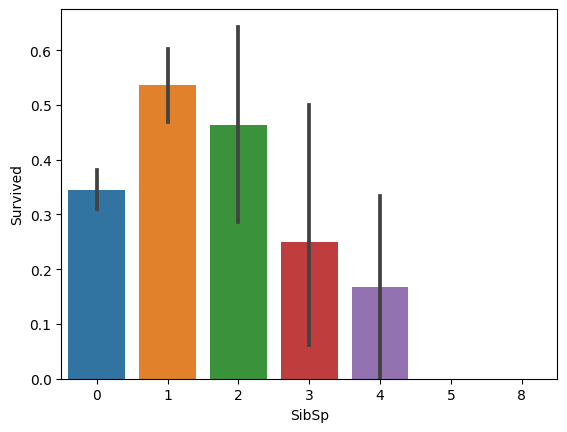

In [79]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

// 그래프를 봐도 3명부터 생존률이 급격히 낮아진다.<br>
// 생존률이 0인 SibSp가 5와 8인 데이터를 살펴보다가 Pclass가 다 3임을 알 수 있다.<br>
// 그럼 SibSp에 따른 생존률을 다시 Pclass로 세분화하여보자.

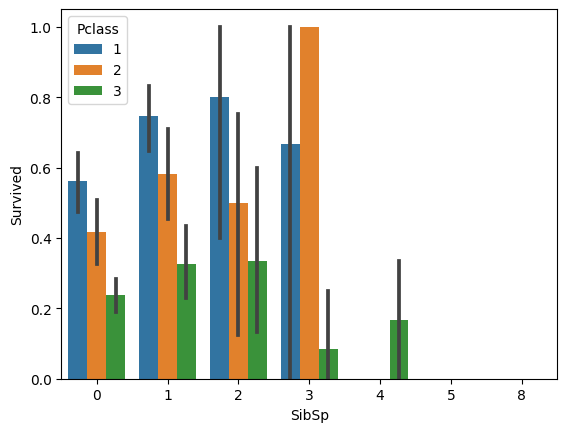

In [80]:
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=train_data)
plt.show()

// 위 그래프에서 Pclass가 3이면서 SibSp가 3이상인 사람의 생존률은 아주 낮았음을 볼 수 있다.

### Parch

// number of parants / children aboard the Titanic <br>
// 같이 Titanic호에 탑승한 부모, 자식의 숫자를 의미

In [81]:
total_set['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

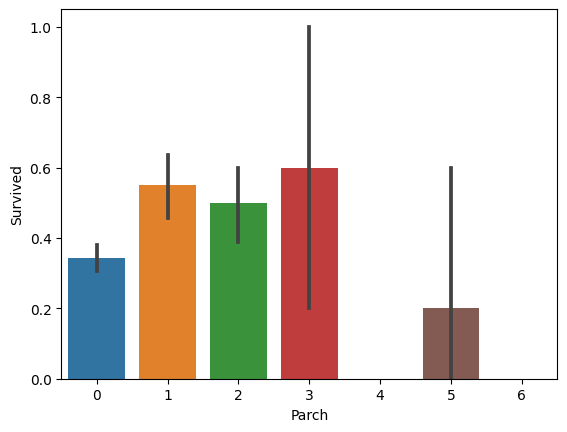

In [82]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.show()

// SibSp와 비슷하게 4이상부터 생존률이 낮아지는 것을 볼 수 있다. 4이상인 데이터를 한 번 보도록 하자.

In [83]:
train_data[train_data['Parch'] >= 4]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
13,14,0,3,0,39.0,1,5,347082,31.2750,S,0.0
25,26,1,3,1,38.0,1,5,347077,31.3875,S,2.0
167,168,0,3,1,45.0,1,4,347088,27.9000,S,2.0
360,361,0,3,0,40.0,1,4,347088,27.9000,S,0.0
438,439,0,1,0,64.0,1,4,19950,263.0000,S,0.0
567,568,0,3,1,29.0,0,4,349909,21.0750,S,2.0
610,611,0,3,1,39.0,1,5,347082,31.2750,S,2.0
638,639,0,3,1,41.0,0,5,3101295,39.6875,S,2.0
678,679,0,3,1,43.0,1,6,CA 2144,46.9000,S,2.0
885,886,0,3,1,39.0,0,5,382652,29.1250,Q,2.0


// 역시 SibSp와 비슷하게 Pclass가 3인 데이터가 압도적으로 많다.

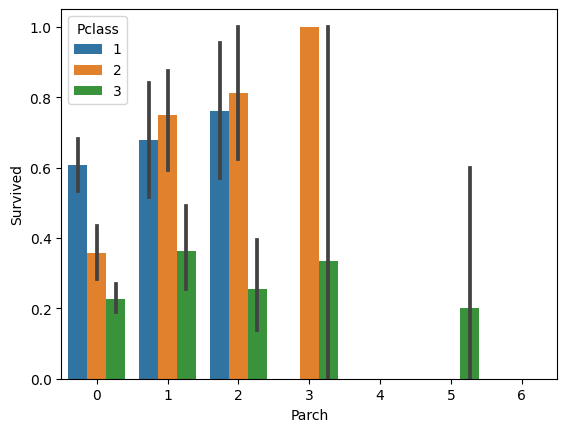

In [84]:
sns.barplot(x='Parch', y='Survived', hue='Pclass', data=train_data)
plt.show()

// Pclass가 3이면서 Parch가 4이상인 경우는 역시 낮은 생존률을 보여준다.<br>
// Parch가 0인 경우는 1-3인 경우보다 생존률이 낮다.

### Fare

// 요금을 살펴보자. 평균은 약 33이며, 최소는 0 - 최대는 512까지 있다. 75% 값은 31인것을 보면 고가 티켓은 아주 비싼 값이라는 것을 알 수 있다.

In [85]:
total_set['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

// 요금이 없는 데이터를 살펴보자.

In [86]:
total_set.loc[total_set['Fare'].isnull()]

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value
152,1044,3,0,0,0,3701,NaN,S,0.0,12


// 요금이 없는 데이터에 평균 값으로 채워준다.

In [87]:
total_set['Fare'].fillna(total_set['Fare'].mean(), inplace=True)
total_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   object 
 6   Fare         1309 non-null   float64
 7   Embarked     1307 non-null   object 
 8   name_code    1309 non-null   float64
 9   Age_value    1309 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 112.5+ KB


// seaborn 의 Distribution plot이라는 함수로 class별 요금분포를 살펴보자.

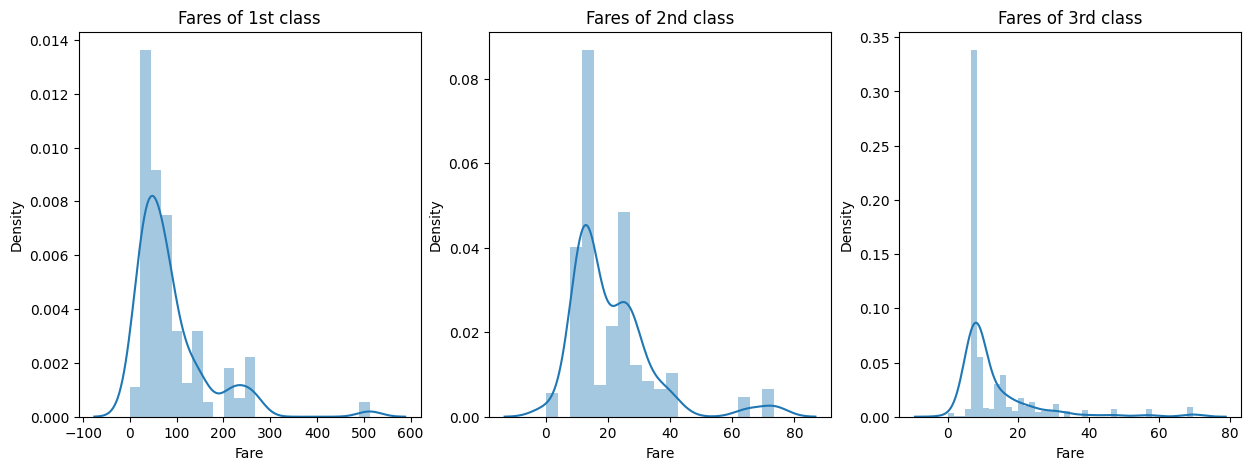

In [88]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(total_set[total_set['Pclass'] == 1]['Fare'], ax=ax[0])
ax[0].set_title('Fares of 1st class')
sns.distplot(total_set[total_set['Pclass'] == 2]['Fare'], ax=ax[1])
ax[1].set_title('Fares of 2nd class')
sns.distplot(total_set[total_set['Pclass'] == 3]['Fare'], ax=ax[2])
ax[2].set_title('Fares of 3rd class')

plt.show()

// class별 평균 요금도 살펴보자

In [89]:
[total_set[total_set['Pclass'] == 1]['Fare'].mean(),
total_set[total_set['Pclass'] == 2]['Fare'].mean(),
total_set[total_set['Pclass'] == 3]['Fare'].mean()]

[87.50899164086688, 21.1791963898917, 13.33108699475507]

// continuous한 값이므로 아래 기준으로 값을 변경시켜보자

- min : 0.000000
- 25% : 7.895800
- 50% : 14.454200
- 75% : 31.275000
- max : 512.329200

In [90]:
bins = [-1, 7.895800, 14.4542, 31.275, 512.3292]
group_names = [0, 1, 2, 3]
total_set['Fare_value'] = pd.cut(total_set['Fare'], bins, labels=group_names)
total_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value,Fare_value
0,1,3,0,1,0,A/5 21171,7.2500,S,0.0,4,0
1,2,1,1,1,0,PC 17599,71.2833,C,2.0,7,3
2,3,3,1,0,0,STON/O2. 3101282,7.9250,S,1.0,5,1
3,4,1,1,1,0,113803,53.1000,S,2.0,6,3
4,5,3,0,0,0,373450,8.0500,S,0.0,6,1


In [91]:
total_set[total_set['Fare_value'].isnull()]

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,name_code,Age_value,Fare_value


In [92]:
bins = [-1, 7.895800, 14.4542, 31.275, 512.3292]
group_names = [0, 1, 2, 3]
train_data['Fare_value'] = pd.cut(train_data['Fare'], bins, labels=group_names)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code,Fare_value
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2.0,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2.0,3
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0.0,1


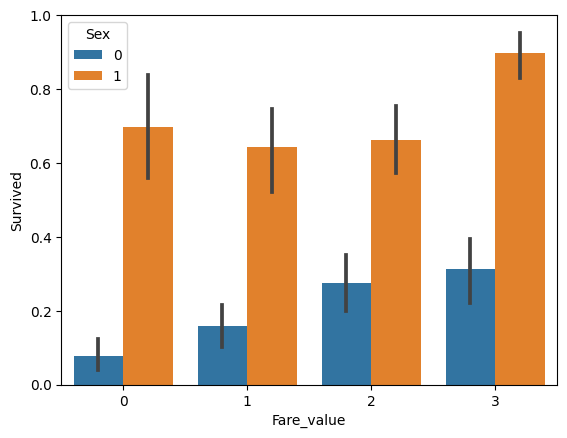

In [93]:
sns.barplot(x='Fare_value', y='Survived', hue='Sex', data=train_data)
plt.show()

// 성별에 따른 Fare_value에 따른 생존률을 살펴보았다.<br>
// 표가 비쌀수록 일반적으로 생존률이 높다는 것을 알 수 있었다.<br>
// Fare는 카테고리 변수 Fare_value로 변환되었기 때문에 drop시켜준다.

In [94]:
total_set.drop(['Fare'], axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,name_code,Age_value,Fare_value
0,1,3,0,1,0,A/5 21171,S,0.0,4,0
1,2,1,1,1,0,PC 17599,C,2.0,7,3
2,3,3,1,0,0,STON/O2. 3101282,S,1.0,5,1
3,4,1,1,1,0,113803,S,2.0,6,3
4,5,3,0,0,0,373450,S,0.0,6,1


In [95]:
total_set.Fare_value.replace({0:0, 1:1, 2:2, 3:3}, inplace=True)

In [96]:
train_data.drop(['Fare'], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,name_code,Fare_value
0,1,0,3,0,22.0,1,0,A/5 21171,S,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,C,2.0,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,S,1.0,1
3,4,1,1,1,35.0,1,0,113803,S,2.0,3
4,5,0,3,0,35.0,0,0,373450,S,0.0,1


In [97]:
train_data.Fare_value.replace({0:0, 1:1, 2:2, 3:3}, inplace=True)

### Ticket

// Ticket에 대해서 알아보자. 우선 값을 보았더니 잘 이해할 수가 없다. drop하도록 하자

In [98]:
total_set.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [100]:
total_set.drop("Ticket", axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,name_code,Age_value,Fare_value
0,1,3,0,1,0,S,0.0,4,0
1,2,1,1,1,0,C,2.0,7,3
2,3,3,1,0,0,S,1.0,5,1
3,4,1,1,1,0,S,2.0,6,3
4,5,3,0,0,0,S,0.0,6,1


### Embarked

// Embarked는 승선한 항구를 의미한다.<br>
// C = Cherbourg, Q = Queenstown, S = Southampton

In [101]:
total_set['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [102]:
total_set['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

// NaN 값 채우기

In [103]:
total_set.loc[total_set['Embarked'].isnull()]

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,name_code,Age_value,Fare_value
61,62,1,1,0,0,NaN,1.0,7,3
829,830,1,1,0,0,NaN,2.0,12,3


// 위에서 확인할 때 2개의 NaN 값이 있었으므로, 가장 개수가 많은 S로 채워준다.

In [104]:
total_set['Embarked'].fillna('S', inplace=True)

In [105]:
total_set['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [106]:
total_set['Embarked'].fillna('S', inplace=True)

In [107]:
train_data['Embarked'].fillna('S', inplace=True)

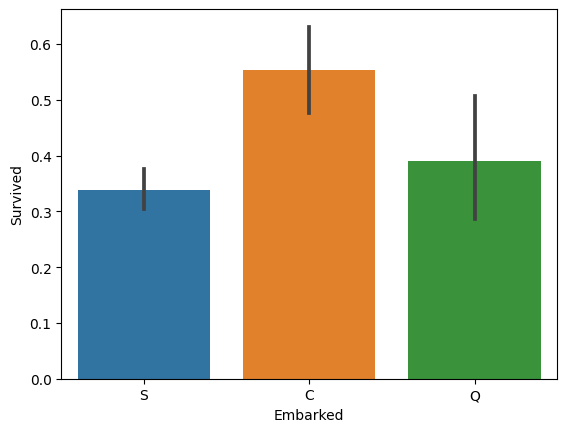

In [109]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.show()

// Port C가 생존률이 약 0.55로 높은 것을 볼 수 있다.<br>
// 각 클래스별로 Embarked 분포를 살펴보자.<br>
// 생존률이 높은 Port C는 1st의 구성이 가장 많고, 생존률이 낮은 Port S는 3rd class의 남성이 가장 많이 탑승했음을 알 수 있다.

In [111]:
pd.crosstab([total_set.Pclass, total_set.Sex], total_set.Embarked, margins=True).style.background_gradient(cmap='summer_r')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

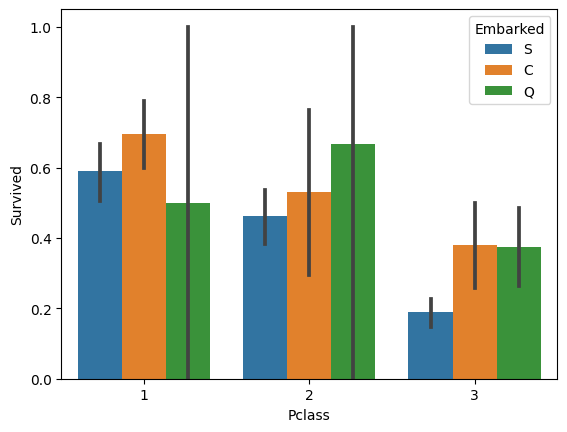

In [115]:
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=train_data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

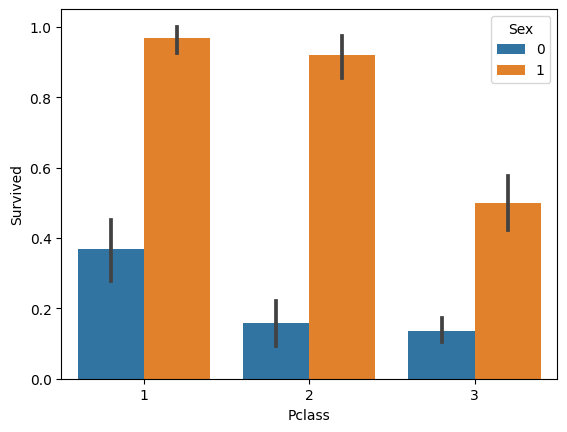

In [121]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)

// 위의 그래프를 보면, 1st, 2nd class의 여성들은 생존률이 높았음을 알 수 있다.

In [124]:
total_set['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
train_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
total_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,name_code,Age_value,Fare_value
0,1,3,0,1,0,0,0.0,4,0
1,2,1,1,1,0,1,2.0,7,3
2,3,3,1,0,0,0,1.0,5,1
3,4,1,1,1,0,0,2.0,6,3
4,5,3,0,0,0,0,0.0,6,1


In [125]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,name_code,Fare_value
0,1,0,3,0,22.0,1,0,A/5 21171,0,0.0,0
1,2,1,1,1,38.0,1,0,PC 17599,1,2.0,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0,1.0,1
3,4,1,1,1,35.0,1,0,113803,0,2.0,3
4,5,0,3,0,35.0,0,0,373450,0,0.0,1
